In [ ]:
!unzip '/content/archive.zip'

Archive:  /content/archive.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  inflating: Testing

In [ ]:
import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _,filenames in os.walk(r'/archive.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:

#import io
#from PIL import Image
#import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(r'/content/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))   #joins images in folder
        img = cv2.resize(img,(image_size,image_size))  #scale image to required size(150*150)
        X_train.append(img)                            #puts images
        Y_train.append(i)                              #puts type of tumor image

for i in labels:
    folderPath = os.path.join(r'/content/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)              #converts array in numpy array
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)    #splits whole data
X_train.shape                                                  #o/p (no. of train img,size,rgb channel)

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
X_train.shape                  #testing number

(2937, 150, 150, 3)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
X_train.shape

(2937, 150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 9s 105ms/step - loss: 0.1215 - accuracy: 0.9580 - val_loss: 0.6123 - val_accuracy: 0.8333
Epoch 2/20
83/83 [==============================] - 8s 97ms/step - loss: 0.1211 - accuracy: 0.9603 - val_loss: 0.5065 - val_accuracy: 0.8163
Epoch 3/20
83/83 [==============================] - 8s 97ms/step - loss: 0.1061 - accuracy: 0.9648 - val_loss: 0.5523 - val_accuracy: 0.8537
Epoch 4/20
83/83 [==============================] - 8s 98ms/step - loss: 0.1207 - accuracy: 0.9565 - val_loss: 0.3916 - val_accuracy: 0.8435
Epoch 5/20
83/83 [==============================] - 8s 96ms/step - loss: 0.0964 - accuracy: 0.9716 - val_loss: 0.4563 - val_accuracy: 0.8367
Epoch 6/20
83/83 [==============================] - 8s 94ms/step - loss: 0.1124 - accuracy: 0.9633 - val_loss: 0.5312 - val_accuracy: 0.8605
Epoch 7/20
83/83 [==============================] - 8s 99ms/step - loss: 0.0770 - accuracy: 0.9712 - val_loss: 0.4523 - val_accuracy: 0.8537
Epoch 8/20
8

In [ ]:
y_train.shape

(2937, 4)

In [ ]:
X_train.shape

(2937, 150, 150, 3)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 [==============================] - 1s 83ms/step


In [ ]:
print (classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.97      0.71      0.82        95
           2       0.85      0.90      0.88        52
           3       0.89      0.99      0.93        87

    accuracy                           0.87       327
   macro avg       0.88      0.88      0.87       327
weighted avg       0.88      0.87      0.87       327



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

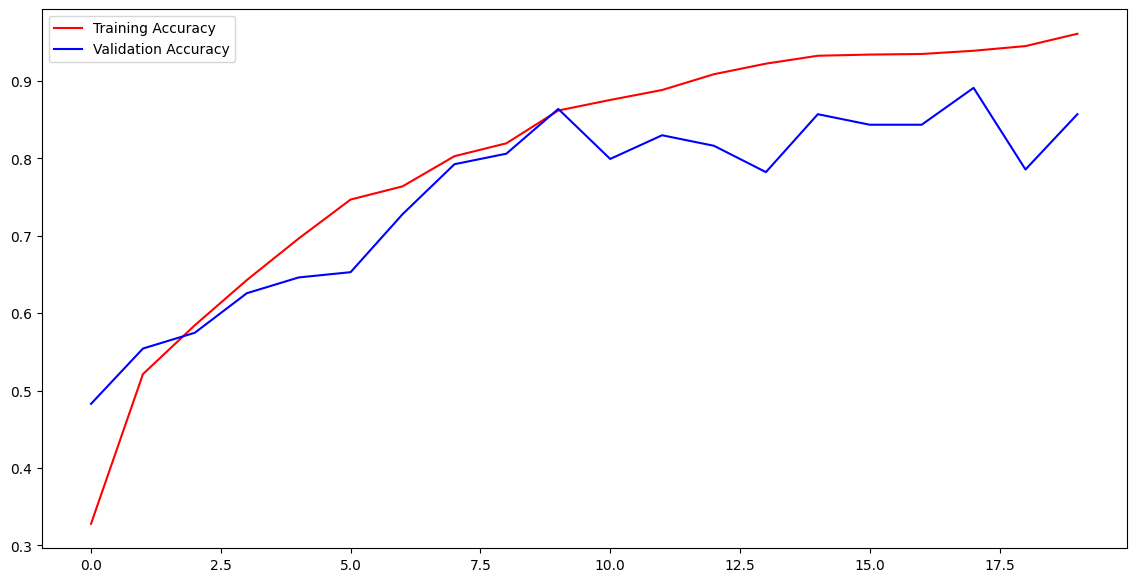

In [ ]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

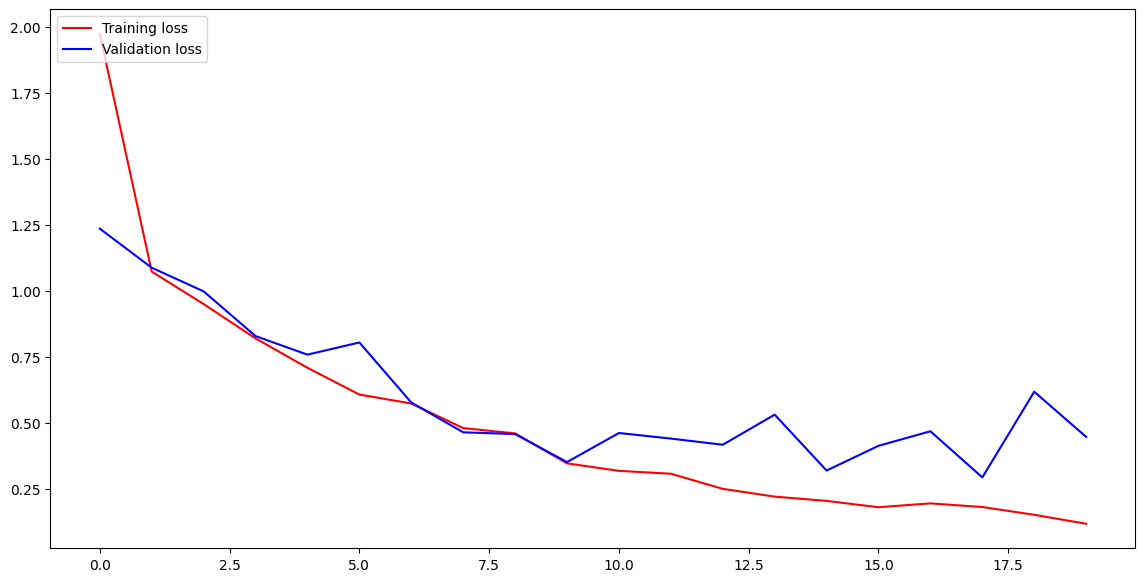

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
img = cv2.imread(r'/content/Testing/no_tumor/image(15).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

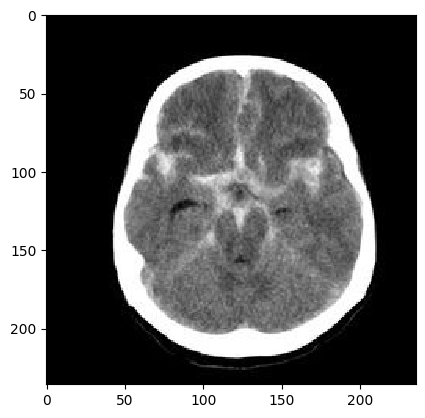

1/1 [==============================] - 0s 18ms/step
2
There is absence of Tumor in brain.


In [ ]:

from tensorflow.keras.preprocessing import image
img = image.load_img(r'/content/Testing/no_tumor/image(15).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()


a=model.predict(img_array)
indices = a.argmax()
print(indices)
if indices==0:
    print("Brain tumor is detected. It is Glioma Tumor.")
if indices==1:
    print("Brain tumor is detected. It is Meninglioma Tumor.")
if indices==2:
    print("There is absence of Tumor in brain.")
if indices==3:
    print("Brain tumor is detected. It is Pituitary Tumor.")

In [ ]:
X_train.shape

(2937, 150, 150, 3)

In [ ]:
# Number of samples in each dataset
num_train_samples = len(X_train)

num_test_samples = len(X_test)

# Dimensions of input data (assuming images)
input_shape = X_train[0].shape

# Number of classes (assuming classification task)
num_classes = len(np.unique(Y_train))

# Print dataset details
print("Dataset Details:")
print("Number of training samples:", num_train_samples)
print("Number of testing samples:", num_test_samples)
print("Input data shape:", input_shape)
print("Number of classes:", num_classes)

Dataset Details:
Number of training samples: 2937
Number of testing samples: 327
Input data shape: (150, 150, 3)
Number of classes: 4


In [ ]:
# Calculate the number of images used for validation
num_val_samples = int(len(X_train) * 0.1)
print("Number of images used for validation:", num_val_samples)

Number of images used for validation: 293


In [ ]:
# Calculate the number of images used for training after validation split
num_train_samples_after_validation = len(X_train) - num_val_samples
print("Number of images used for training after validation split:", num_train_samples_after_validation)

Number of images used for training after validation split: 2644


In [ ]:
X_train.shape

(2937, 150, 150, 3)